In [1]:
import pandas as pd
import json
import datetime as dt
import os
import sys
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
data_path = '../data/interim/'

# Activities 
1. descriptive statistics of calories, steps, average heart rate, druation: 
2. distributions of heart rate zones, box plots / histograms idk
3. start time distributions

In [3]:
activities_df = pd.read_csv(data_path + 'initial_clean_activities.csv')

In [4]:
activities_df

,activityTypeId,activityName,calories,steps,averageHeartRate,duration,activeDuration,startTime,hrz_OutofRange_calories,hrz_FatBurn_calories,hrz_Cardio_calories,hrz_Peak_calories,hrz_OutofRange_minutes,hrz_FatBurn_minutes,hrz_Cardio_minutes,hrz_Peak_minutes
0,90013,Walk,562,4874.0,129.0,3840000,3840000,2023-11-25T18:59:25.000-05:00,10.698376,68.365232,494.604188,0.0,0,10,54,0
1,90013,Walk,125,1142.0,104.0,1024000,1024000,2023-11-27T14:21:24.000-05:00,40.445080,93.676024,0.000000,0.0,4,13,0,0
2,90009,Run,65,536.0,110.0,552000,546000,2023-11-29T10:54:56.000-05:00,15.264756,43.315376,6.523400,0.0,3,5,1,0
3,90013,Walk,186,1615.0,124.0,1229000,1229000,2023-11-29T16:05:01.000-05:00,11.481184,104.374400,82.194840,0.0,0,12,8,0
4,90013,Walk,135,1405.0,107.0,972000,972000,2023-11-30T11:18:52.000-05:00,54.927028,78.802672,9.654632,0.0,6,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,90013,Walk,121,1103.0,101.0,1077000,1077000,2024-11-12T16:43:27.000-05:00,105.548058,21.932064,0.000000,0.0,14,3,0,0
438,90013,Walk,142,1468.0,123.0,1024000,1024000,2024-11-12T22:07:47.000-05:00,8.224524,142.184574,0.000000,0.0,1,16,0,0
439,90013,Walk,137,1618.0,110.0,1074000,1074000,2024-11-13T14:10:30.000-05:00,114.520266,31.402728,0.000000,0.0,13,4,0,0
440,90013,Walk,99,1167.0,104.0,972000,972000,2024-11-13T18:27:24.000-05:00,92.962044,14.704452,0.000000,0.0,13,3,0,0


In [5]:
activities_df.describe()

,activityTypeId,calories,steps,averageHeartRate,duration,activeDuration,hrz_OutofRange_calories,hrz_FatBurn_calories,hrz_Cardio_calories,hrz_Peak_calories,hrz_OutofRange_minutes,hrz_FatBurn_minutes,hrz_Cardio_minutes,hrz_Peak_minutes
count,442.000000,442.000000,436.000000,441.000000,4.420000e+02,4.420000e+02,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,84026.531674,207.737557,2147.160550,110.746032,1.659262e+06,1.659249e+06,132.509651,51.909632,29.408831,2.177012,16.929864,6.742081,3.346154,0.223982
std,20817.885972,164.153139,1590.812367,13.805101,1.211744e+06,1.211756e+06,107.686737,66.302039,106.970714,18.554296,15.125689,8.655487,11.541706,1.925380
min,1071.000000,43.000000,331.000000,82.000000,5.520000e+05,5.460000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90013.000000,127.000000,1368.500000,102.000000,1.024000e+06,1.024000e+06,70.343795,5.205040,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000
50%,90013.000000,156.000000,1660.000000,109.000000,1.229000e+06,1.229000e+06,117.568841,30.847360,0.000000,0.000000,15.000000,4.000000,0.000000,0.000000
75%,90013.000000,215.000000,2125.250000,117.000000,1.727500e+06,1.727500e+06,159.207534,74.143685,8.588316,0.000000,20.000000,10.000000,1.000000,0.000000
max,90013.000000,1526.000000,13678.000000,172.000000,9.782000e+06,9.782000e+06,1019.467134,467.302500,1030.682394,267.172416,140.000000,65.000000,112.000000,27.000000


1. Steps is not recorded for a few activities
2. The average calories i burn in any activity is 207 calories, with the min being 43 and the max being 1500.
3. My averageHeartRate in my activities is 110 bpm and the min is 82, max being 172. 
4. most of my heartzone calories are from hrz out of range then fatburn then cardio then peak.
5. resting zone: 0-100, fatburn: 100-138, cardio zone: 138-168, peak zone: 168-200
6. I spend most of my time out of range, below the range to be counted activezoneminutes (fat, cardio, peak), meaning most of my activities are in "resting zones" which is not considered activezoneminutes. 
7. Same pattern with the hrz minutes, which actually seems it indicate that my activities are very short.

f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

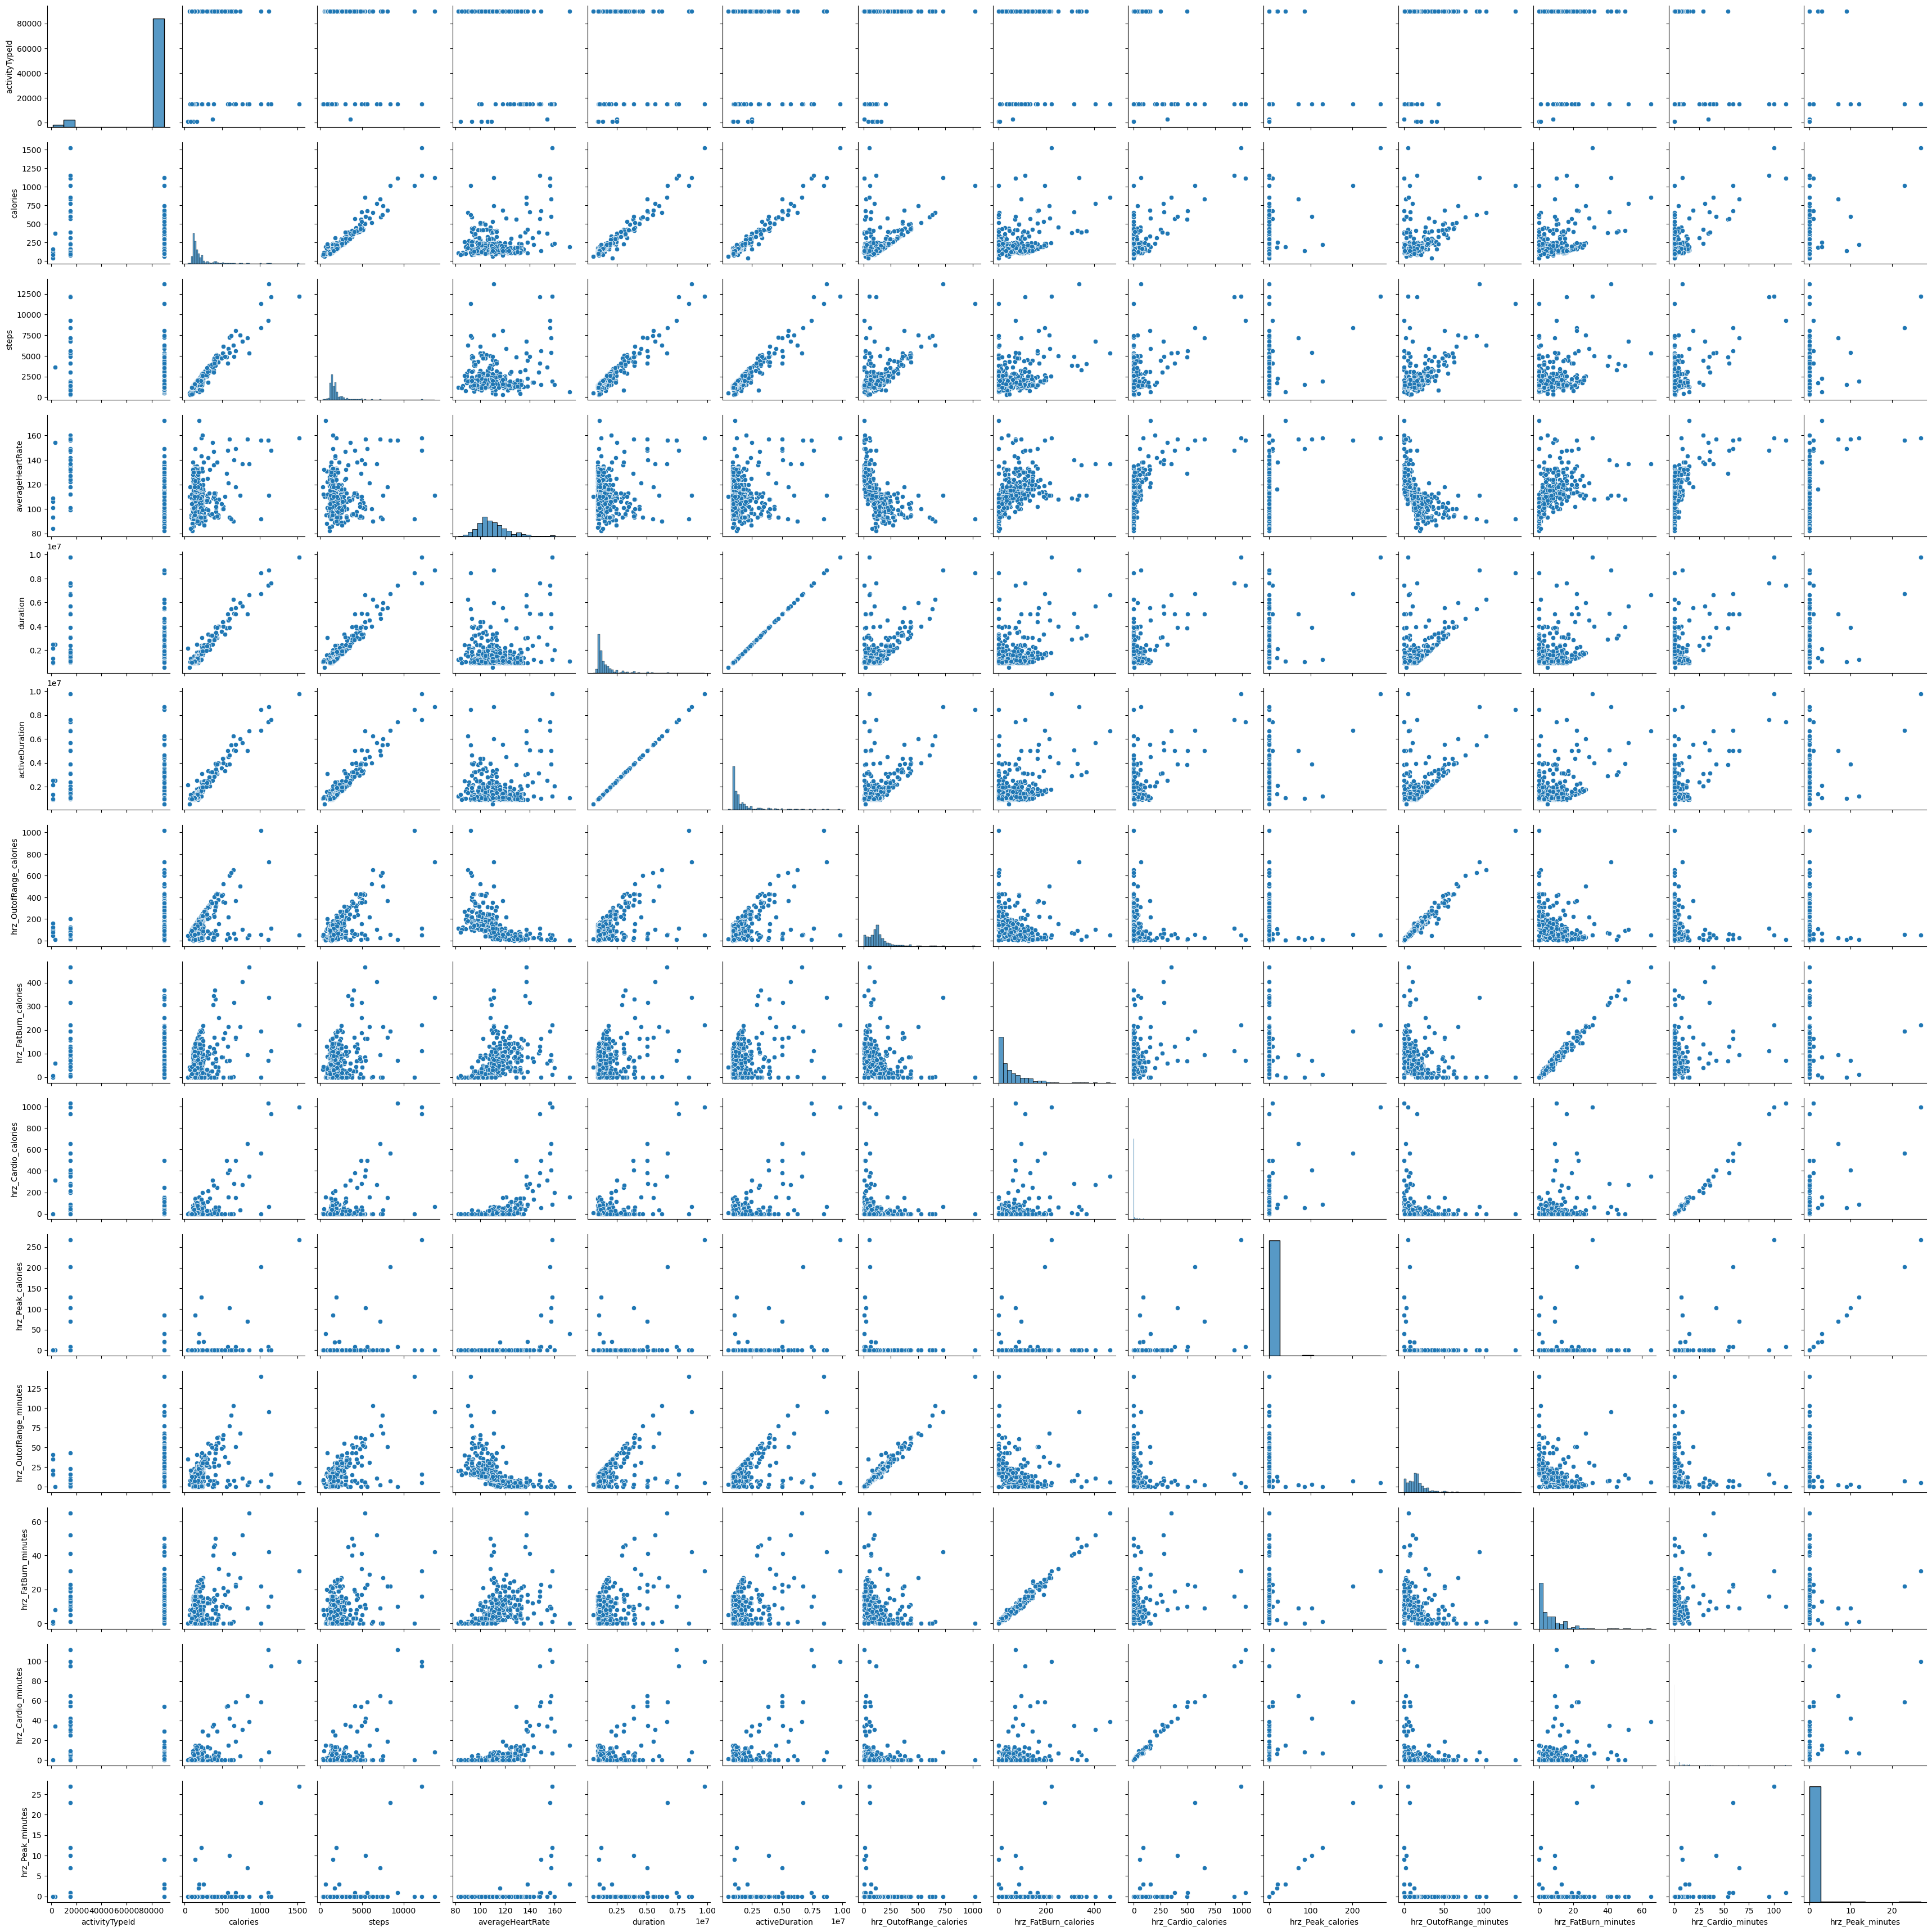

In [6]:
#scatter_matrix(activities_df, alpha=0.8, figsize=(12, 12), diagonal='kde')
sns.pairplot(activities_df)

plt.show()


1. Things worth exploring:
hrz_outofzone_calories with steps, duration, activeduration, 
2. It's clear that if ang heart zones increase the fatburn calories increase exponentially and out of range decreases exponentially. but cardio and peak show a weaker non-linear relationship. 
3. Many of the rest are linear relationships or no relationships. 

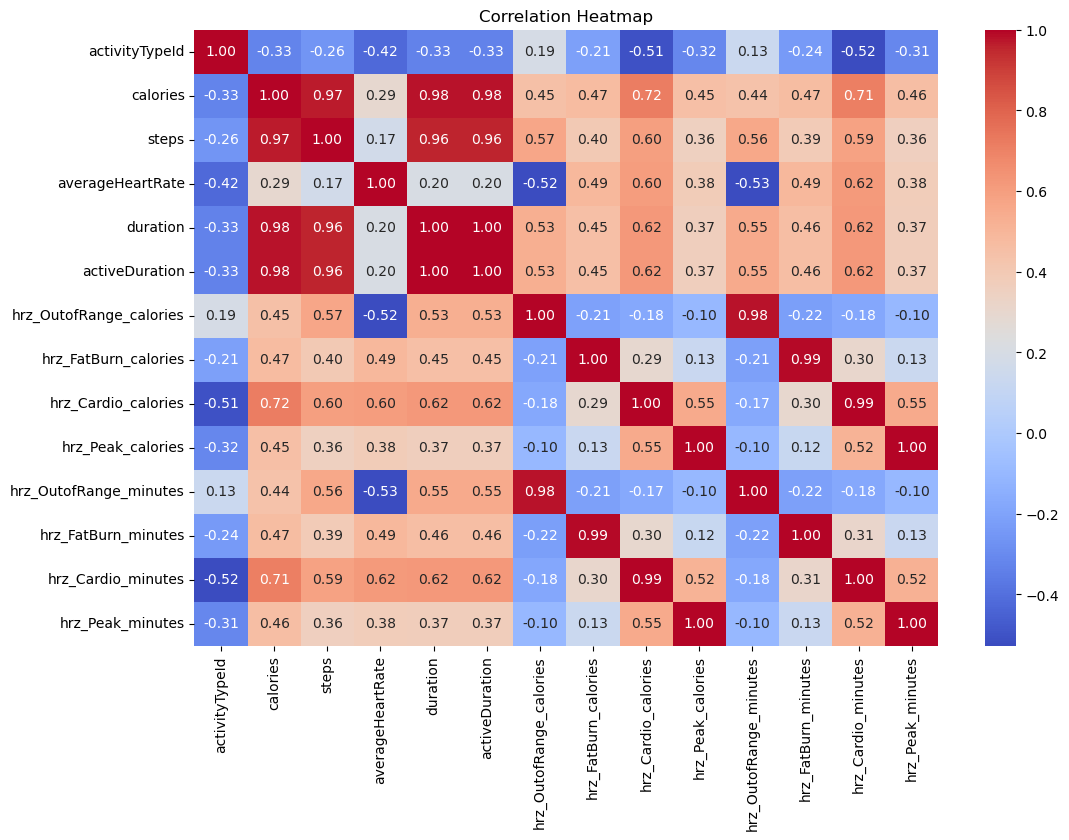

In [7]:
activities_numeric_df = activities_df.select_dtypes(include="number")

activities_corr = activities_numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(activities_corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


1. Calories has a strong positive correlation with cardio minutes, calories, steps, duration
2. Steps also have a positive correlation with duration
3. average hear rate has half negative correlation with out of range calories
4. hrz cardio has the strongest correlation with calories than the rest of the zones 

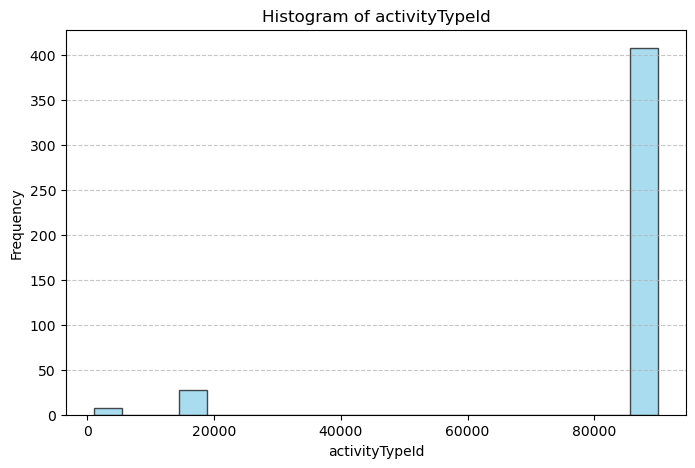

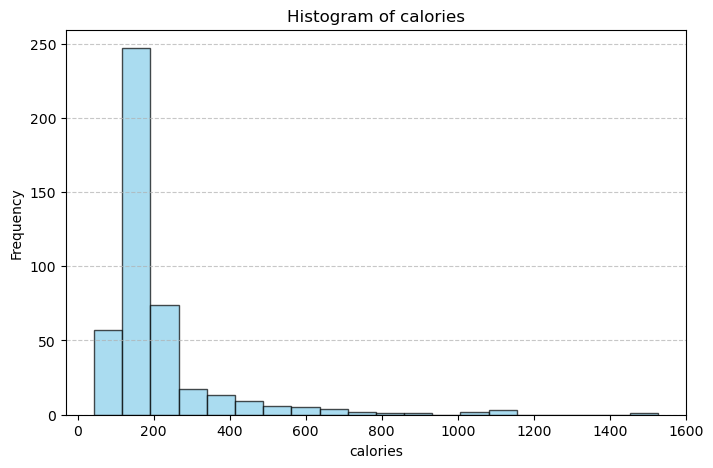

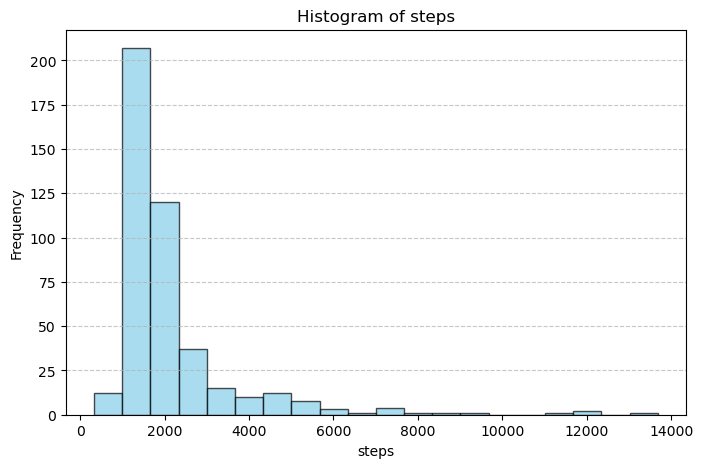

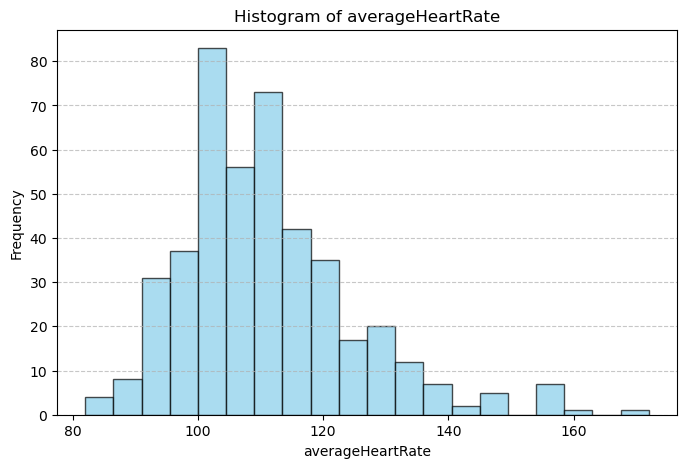

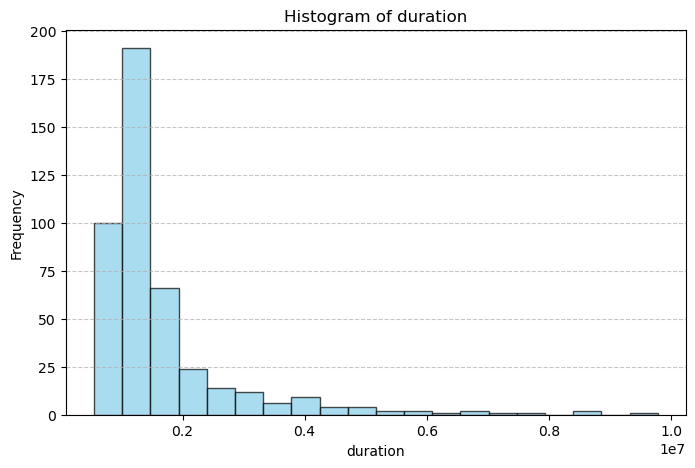

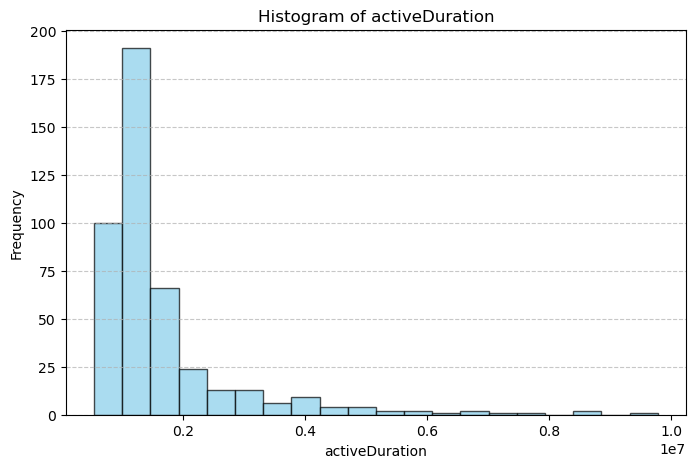

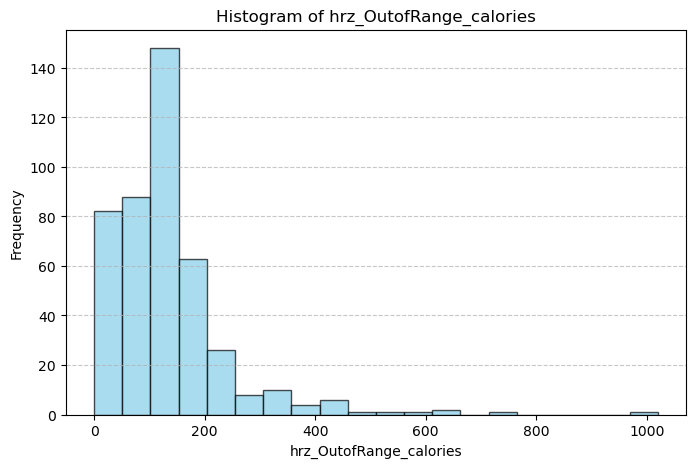

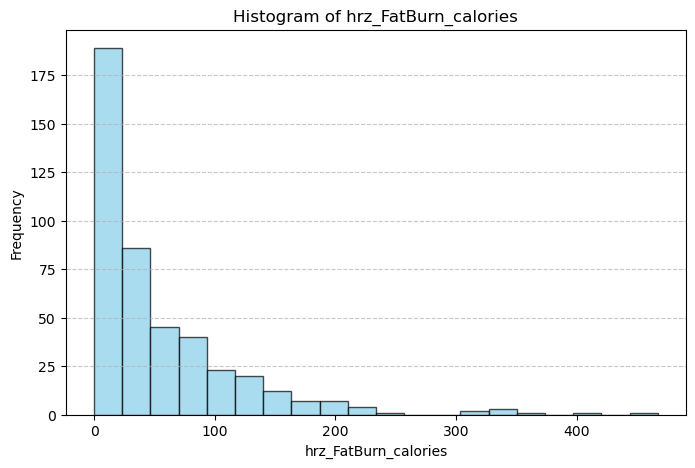

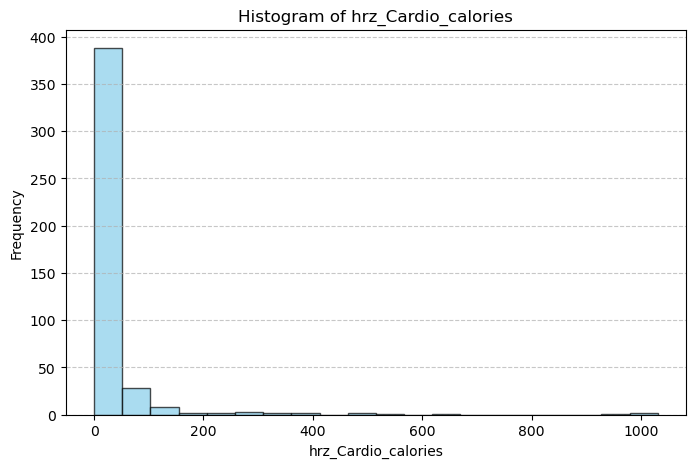

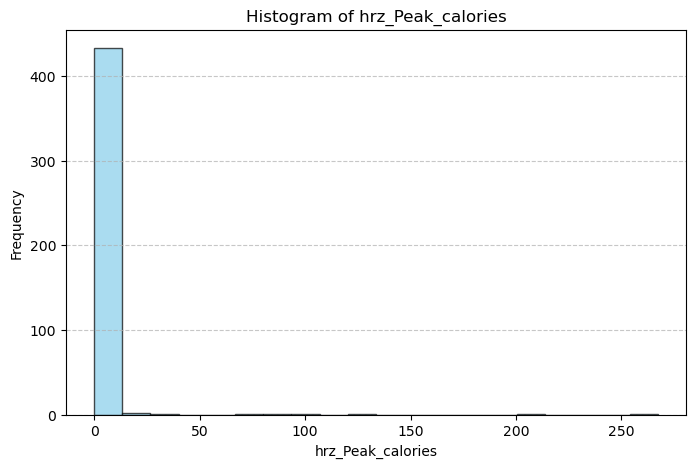

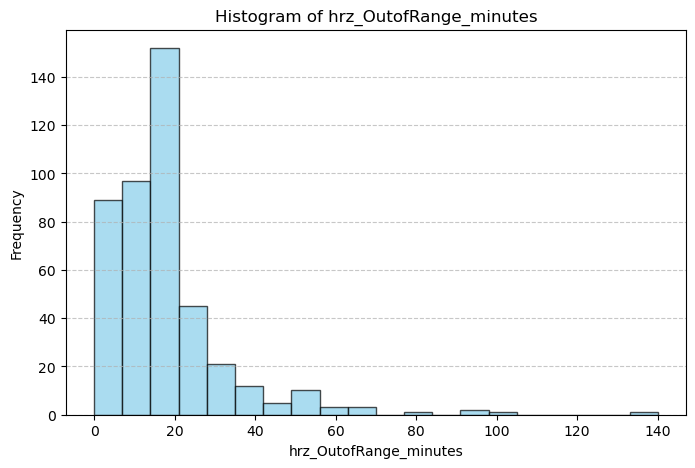

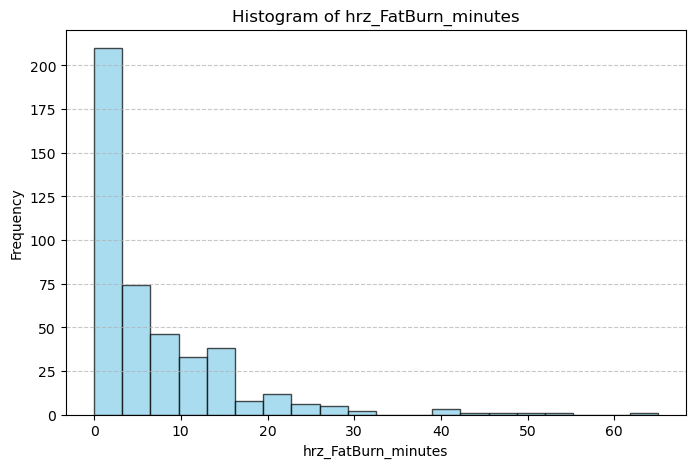

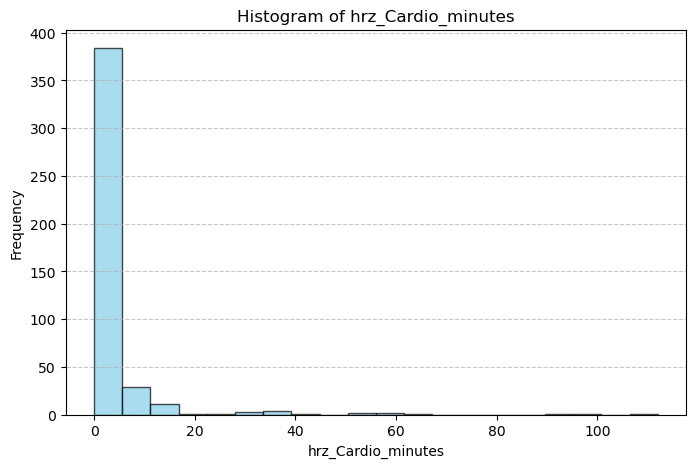

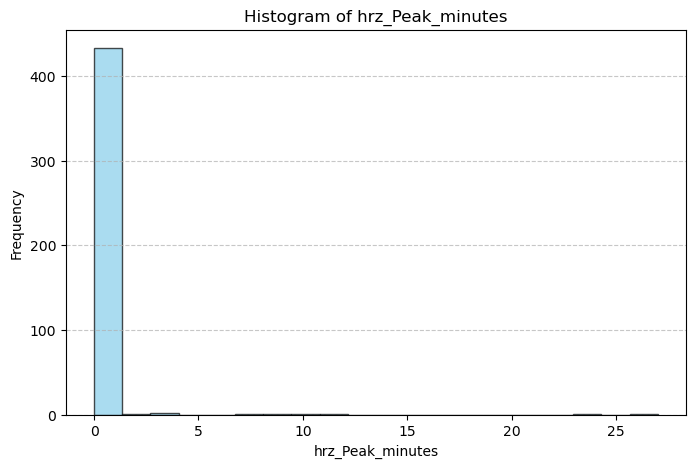

In [8]:
def histogram_plot(col, col_name):
    plt.figure(figsize=(8, 5))
    plt.hist(col.dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
for col_name in activities_numeric_df.columns:
    histogram_plot(activities_numeric_df[col_name], col_name)

There are a lot of outliers in this dataset, so I am going to make sure that I study those.

1. Per activity the common range is 100-270 calories 
2. Steps are around 2000, with the spike in frequency  <2000, and diminishes very quickly after 2500
3. Avg heartrate slight right tail skew norm distribution, mainly being from 90-120, remember that fat burn zone is from 100 - 140, and anything less than 100 is out of range. 
4. Main duration is 10-20-30 minutes, main spike being 20 minutes. 
5. hrz out of range burns 0-200 calories with main being a little less than <200 
6. hrz cardio calories <100 mainly, but has the highest correlation with calories in general.
7. hrz peak calories mainly 0, fatburn minutes 0-15, mainly 0, hrz carido and peak minutes as well

### how is hrz cardio minutes less than 20 minutes mainly, hrz cardio calories is < 200, mainly 0-80ish, and it has the highest correlation with calories out of all the zones?

Explore this question after looking at start time distributions 

Want to look at day of the week distributions, month

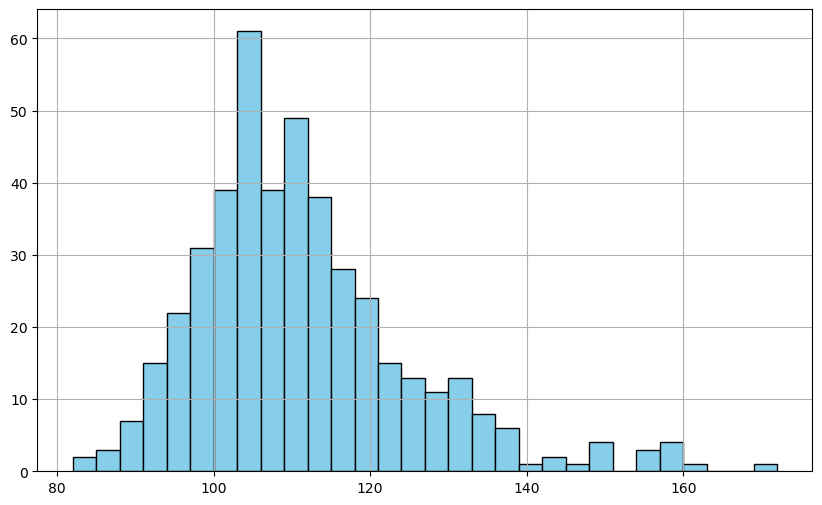

In [9]:
hist = activities_numeric_df['averageHeartRate'].hist(
    bins=30,
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black',
    grid=True
)

Average Heart Rate is normal with a tail skewed to the left. Makes sense that the outliers are at the higher ends of the BPM.

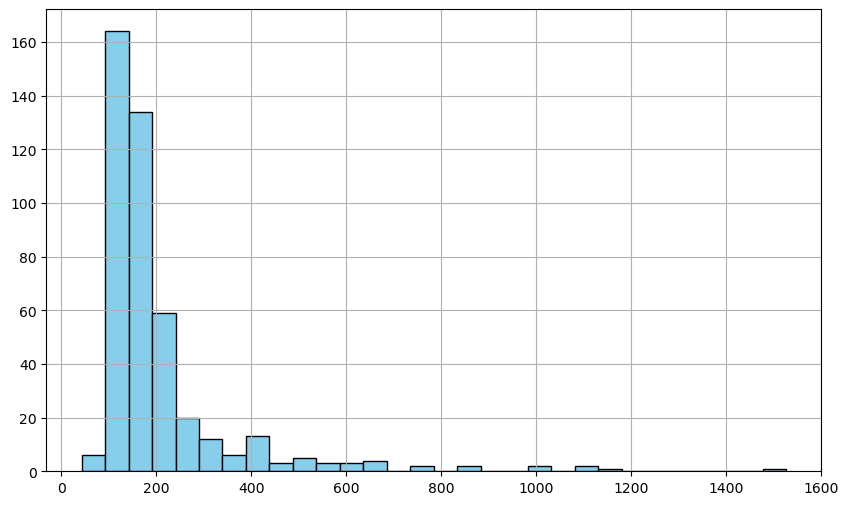

In [10]:
hist = activities_numeric_df['calories'].hist(
    bins=30,
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black',
    grid=True
)


Calories is very much geared towards less than 200.

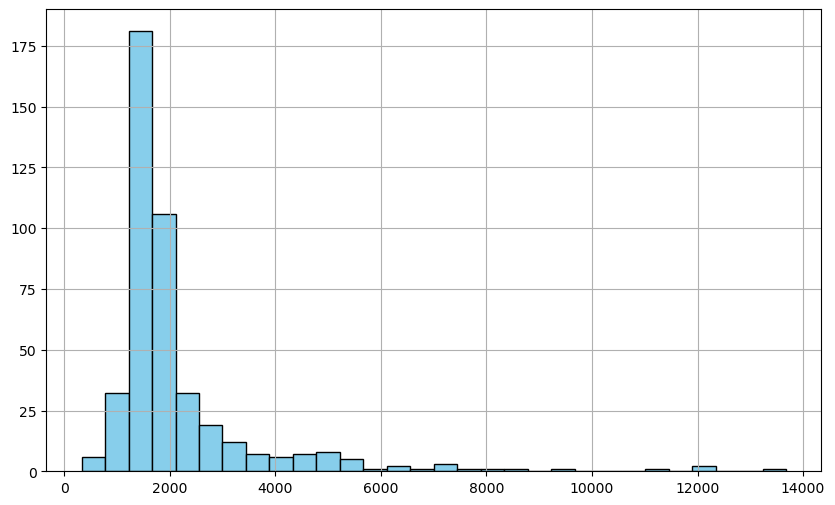

In [11]:
hist = activities_numeric_df['steps'].hist(
    bins=30,
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black',
    grid=True
)

The # of steps is has a large spike at just below 2000, and then tapers off aggresively, suggesting anything above 3000 is not common.

In [16]:
activities_df['startTime'] = pd.to_datetime(activities_df['startTime'], utc=True)
activities_df['startTime'] = activities_df['startTime'].dt.tz_convert('America/New_York')
activities_df['time_only'] = activities_df['startTime'].dt.time
activities_df['seconds_since_midnight'] = (activities_df['startTime'].dt.hour * 3600 + 
                              activities_df['startTime'].dt.minute * 60 + 
                              activities_df['startTime'].dt.second)

# Create histogram
# plt.figure(figsize=(12, 6))
# plt.hist(activities_df['seconds_since_midnight'], 
#          bins=24,  # One bin per hour
#          color='skyblue', 
#          edgecolor='black',
#          alpha=0.7)

# # Customize x-axis to show hours instead of seconds
# plt.xticks(np.arange(0, 86400+1, 7200),  # 86400 seconds in a day, tick every 2 hours
#            [f'{x:02d}:00' for x in range(0, 24+1, 2)],
#            rotation=45)

# plt.title('Distribution of Activity Start Times', fontsize=14)
# plt.xlabel('Time of Day', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(True, alpha=0.3)

# # Add some padding to the layout
# plt.tight_layout()

# Show plot
#plt.show()



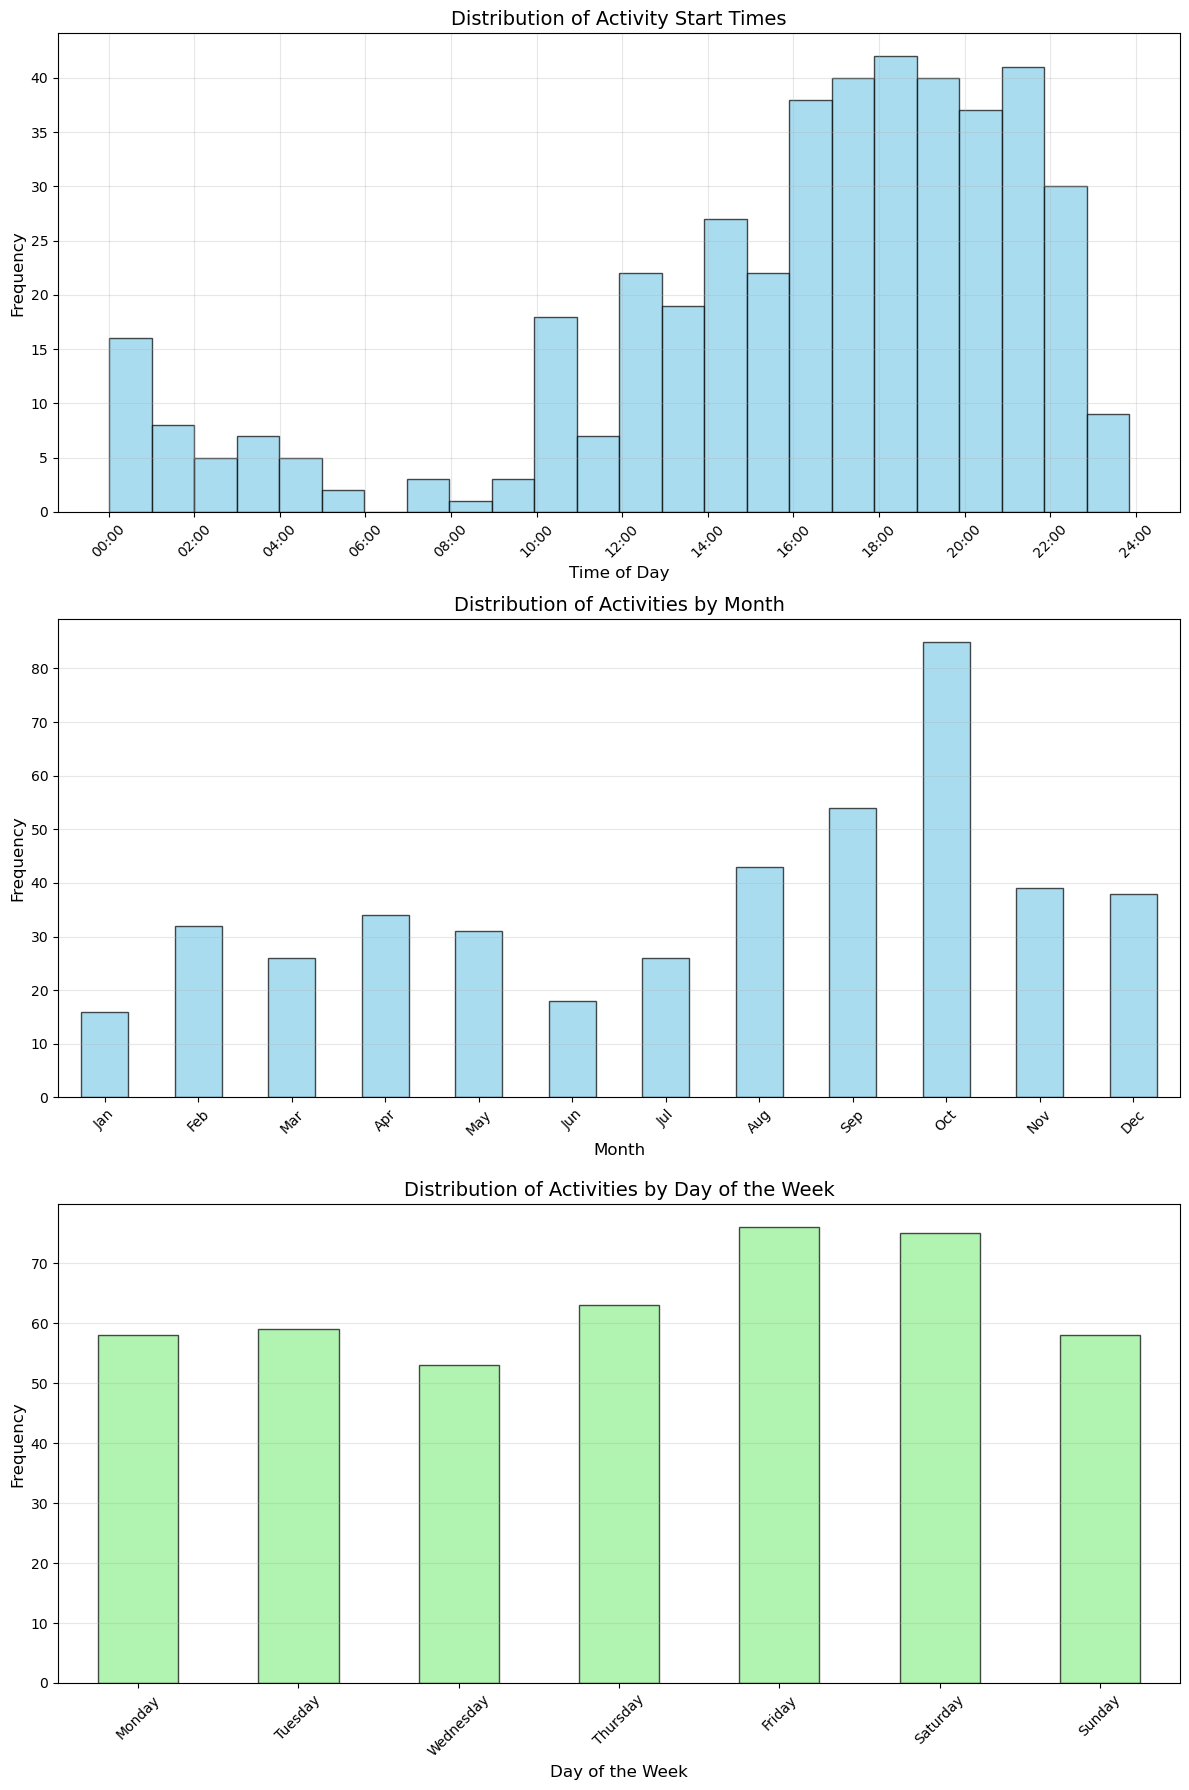

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Time of day histogram
axes[0].hist(activities_df['seconds_since_midnight'], bins=24, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xticks(np.arange(0, 86400+1, 7200))
axes[0].set_xticklabels([f'{x:02d}:00' for x in range(0, 24+1, 2)], rotation=45)
axes[0].set_title('Distribution of Activity Start Times', fontsize=14)
axes[0].set_xlabel('Time of Day', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Month bar plot
activities_df['month'] = activities_df['startTime'].dt.month
activities_df['month'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Activities by Month', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Day of week bar plot
activities_df['day_of_week'] = activities_df['startTime'].dt.day_name()
activities_df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', ax=axes[2], color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_title('Distribution of Activities by Day of the Week', fontsize=14)
axes[2].set_xlabel('Day of the Week', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
axes[2].grid(axis='y', alpha=0.3)

# Add padding to layout
plt.tight_layout()

# Show combined plot
plt.show()


Activities increase as the day progresses. Would be interesting to see what this looks like in accordance to what time I wake up. Explanations for late activities is going to the gym late, or late night walks, something I do often.
Also interestingly, my activities count increases when im in school. Intuitively it would increase when im not, because i would have more time when im at home, but i think things like walking to class, or walking to the dining hall accounts for a large portion of my activities in the form of walking. 

We can also see that there is a spike in activities done on fridays and saturdays. There are normally the days where I have work, or hangout with friends, so those could be possible explainations. It would also support the fact that the timing of the activities are later in the day. 

# Breathing Rate, Heart Rate Variability, Skin Temp basic analysis

In [19]:
br_df = pd.read_csv(data_path + 'initial_clean_br.csv')
hrv_df = pd.read_csv(data_path + 'initial_clean_hrv.csv')
skin_df = pd.read_csv(data_path + 'initial_clean_tempSkin.csv')

simple_dfs = {'Breathing Rate':br_df, 'Heart Rate Variability':hrv_df, 'Skin Temp':skin_df}


In [20]:
for key, df in simple_dfs.items():
    print(key)
    print(df.describe())
    print()

Breathing Rate
       value.breathingRate
count           338.000000
mean             13.837278
std               0.692071
min              12.200000
25%              13.400000
50%              13.800000
75%              14.200000
max              16.600000

Heart Rate Variability
       value.dailyRmssd  value.deepRmssd
count        339.000000       339.000000
mean          66.362086        71.976552
std           19.021005        24.816611
min            0.000000         0.000000
25%           53.002000        57.788000
50%           63.205000        67.671000
75%           78.373000        82.426500
max          135.386000       291.015000

Skin Temp
       value.nightlyRelative
count             334.000000
mean               -0.023054
std                 0.690068
min                -2.000000
25%                -0.475000
50%                 0.000000
75%                 0.500000
max                 1.600000



Breathing Rate: # of breaths per minute 

Heart Rate Variability: The variance of time in between heart beats in root mean squared of successive differences. High RMSSD is better.

Skin Temp: ... temperature of skin... this measuire is a +/- of the 30 day average temp baseline

In [25]:
def plot_histogram(df, col):
    plt.figure(figsize=(8, 5))
    
    # Histogram
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True)
    
    # Smooth line (Kernel Density Estimate)
    sns.kdeplot(df[col], color='red', linewidth=2, label='Density Curve')
    
    # Titles and labels
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


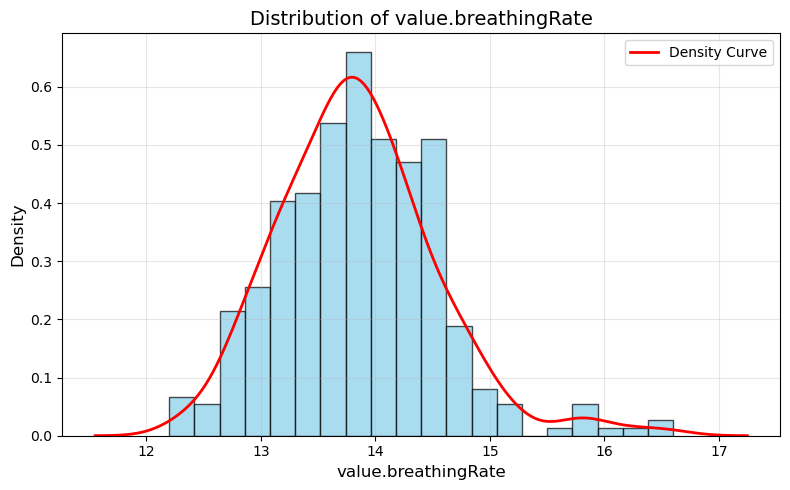

f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


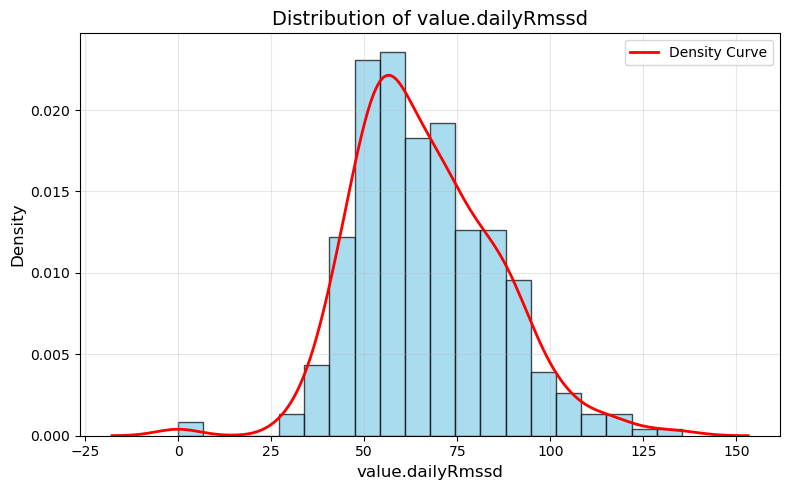

f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


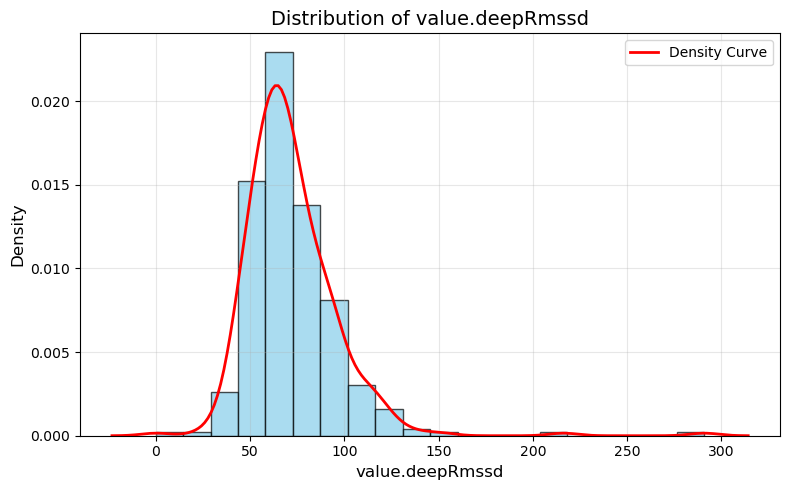

f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


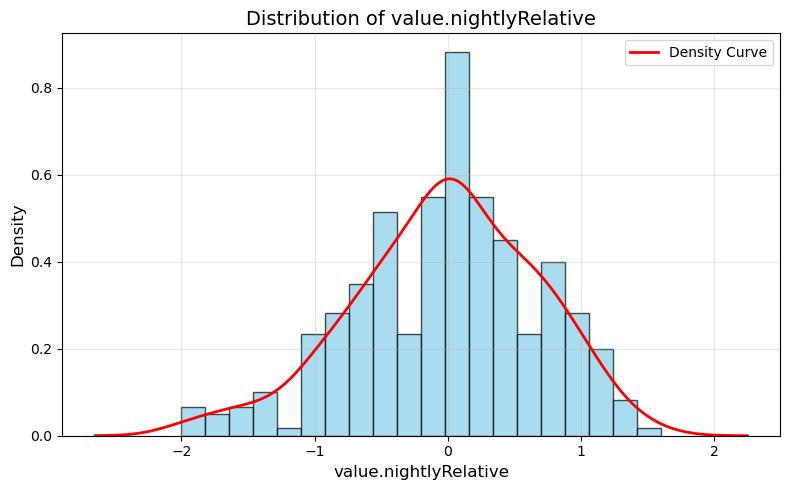

In [26]:
for key, df in simple_dfs.items():
    for col in df.columns[1:]:
        plot_histogram(df, col)

We can see that they are all normally distributed, with daily and deep rmssd being skewed to the right a little, meaning the mean is less than the median. Most likely due to the outliers. 

It would be interesting to see if the outliers are correlated to anything else in the multivariate analysis. 

Next to do is: 

Sleep anaylsis 

Google form 

myfitnessplan